**Binary_classification using VGG16**

`In this file we are going to develop a binary model using transfer learning technique pretrained model called vgg16`

official documentation : https://keras.io/api/applications/vgg/

In [1]:
import numpy 


In [2]:
train_data_path = '/content/drive/MyDrive/dataset/training_set'

In [3]:
test_data_path = '/content/drive/MyDrive/dataset/test_set'

`Making Images into linear format using tensorflow ImageDataGenerator`

In [4]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
preprocess_train = ImageDataGenerator(rescale = 1. / 255 , 
                                      shear_range = 0.2 , 
                                      zoom_range = 0.4,
                                      vertical_flip = True,
                                      horizontal_flip = True)


preprocess_test = ImageDataGenerator(rescale = 1./255)



`collecting each image from train and test folder:`

In [7]:
labels = ['cats','dogs']

In [8]:
train_data = preprocess_train.flow_from_directory(train_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 8005 images belonging to 2 classes.


In [9]:
test_data = preprocess_test.flow_from_directory(test_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 2023 images belonging to 2 classes.


`Now I am not developing my own custom model so I am taking a copy of vgg16 Architecture`

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

making image size 

In [12]:
image_size = [256,256]

In [13]:
sol = VGG16(input_shape = image_size + [3] , weights='imagenet' , include_top=False)


58889256/58889256 [==============================] - 2s 0us/step


In [15]:
# to make not to update weights of vgg16:

for i in sol.layers:
  i.trainable = False

In [16]:
from tensorflow.keras.layers import Flatten

In [18]:
# developing my own output layer:

y = Flatten()(sol.output)


In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid


In [21]:
from keras.api._v2.keras import activations
final = Dense(1 ,activation = 'sigmoid')(y)

In [22]:
from tensorflow.keras.models import Model


In [23]:
vgg16_model = Model(sol.inputs , final)

In [24]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [25]:
vgg16_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])


In [27]:
vgg16_model.fit(train_data , epochs = 1)

251/251 [==============================] - 3616s 14s/step - loss: 0.4556 - Accuracy: 0.7811


**checking with test_data**

In [28]:
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [29]:
y_test_pred = vgg16_model.predict(test_data)

64/64 [==============================] - 900s 14s/step


In [30]:
y_test_pred

array([[0.23048088],
       [0.5300291 ],
       [0.6083107 ],
       ...,
       [0.99640816],
       [0.03019045],
       [0.9165902 ]], dtype=float32)

In [31]:
c = []

for i in y_test_pred:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)

In [32]:
c

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,


In [33]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [34]:
accuracy_score(test_data.classes , c)

0.5007414730598122

In [35]:
confusion_matrix(test_data.classes , c)

array([[414, 597],
       [413, 599]])

In [36]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45      1011
           1       0.50      0.59      0.54      1012

    accuracy                           0.50      2023
   macro avg       0.50      0.50      0.50      2023
weighted avg       0.50      0.50      0.50      2023



**checking with own data**

In [37]:
import cv2

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def predictions(path):
  image = cv2.imread(path)
  image = cv2.resize(image , (256,256))
  image = np.array(image) / 255.0
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  result = vgg16_model.predict(image)
  print(result)
  if result > 0.5:
    print('dog')
  else:
    print('cat')
  img = plt.imread(path)
  plt.imshow(img)


(1, 256, 256, 3)
1/1 [==============================] - 0s 29ms/step
[[1.8246377e-05]]
cat


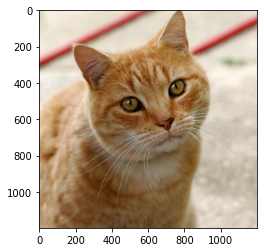

In [51]:
predictions('/content/Cat03.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 74ms/step
[[0.9975974]]
dog


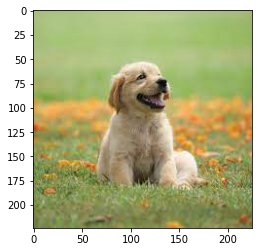

In [52]:
predictions('/content/download.jpg')